<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Create-Aggregate-Features" data-toc-modified-id="Create-Aggregate-Features-1">Create Aggregate Features</a></span></li><li><span><a href="#Calculate-Next-Day-Return" data-toc-modified-id="Calculate-Next-Day-Return-2">Calculate Next Day Return</a></span></li><li><span><a href="#Iterate-Through-Month" data-toc-modified-id="Iterate-Through-Month-3">Iterate Through Month</a></span></li><li><span><a href="#3-Bins" data-toc-modified-id="3-Bins-4">3 Bins</a></span></li><li><span><a href="#5-Bins" data-toc-modified-id="5-Bins-5">5 Bins</a></span></li><li><span><a href="#10-Bins" data-toc-modified-id="10-Bins-6">10 Bins</a></span></li><li><span><a href="#Comparison" data-toc-modified-id="Comparison-7">Comparison</a></span></li></ul></div>

In [14]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import MinMaxScaler
import datetime as dt
import matplotlib.pyplot as plt
import matplotlib.ticker as mtick
import matplotlib.dates as mdates

In [15]:
df = pd.read_csv("../00-data/portfolio_data/2021/portfolio_jan2021.csv")
df

,date,tags,ticker,volume,pos_mean,pos_median,pos_min,pos_max,neg_mean,neg_median,...,net_median,net_min,net_max,read_score,same_day_raw,next_day_raw,sp_avg_return,next_day_sp,same_day_relative,next_day_relative
0,2021-01-04,A,A,2.0,0.110000,0.000000,0.0,1.000000,0.015000,0.0,...,0.000000,-0.500000,1.000000,0.217502,0.252231,-0.953746,1.933110,-1.031859,-1.680879,0.135142
1,2021-01-04,AAL,AAL,1.0,0.100000,0.000000,0.0,1.000000,0.030000,0.0,...,0.000000,-1.000000,1.000000,0.149566,4.542587,-3.418231,1.933110,-1.031859,2.609477,-2.073725
2,2021-01-04,AAPL,AAPL,21.0,0.111429,0.000000,0.0,0.851429,0.122381,0.0,...,0.000000,-0.672857,0.851429,0.269487,3.078190,-1.644810,1.933110,-1.031859,1.145081,-0.064243
3,2021-01-04,ABBV,ABBV,5.0,0.034000,0.000000,0.0,0.600000,0.048000,0.0,...,0.000000,-0.600000,0.600000,0.243894,1.651424,-1.034054,1.933110,-1.031859,-0.281686,1.948018
4,2021-01-04,ABT,ABT,4.0,0.312500,0.115000,0.0,1.000000,0.015000,0.0,...,0.115000,-0.247500,1.000000,0.409763,0.383455,-1.479101,1.933110,-1.031859,-1.549655,0.236260
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9821,2021-01-29,YUM,YUM,2.2,0.295500,0.199333,0.0,0.985000,0.028667,0.0,...,0.197333,-0.462667,0.985000,0.362005,0.587715,-0.802034,1.388965,-0.469278,-0.801250,1.773387
9822,2021-01-29,ZBH,ZBH,2.0,0.263333,0.000000,0.0,0.766667,0.079000,0.0,...,0.000000,-0.766667,0.766667,0.345520,1.493591,0.626332,1.388965,-0.469278,0.104626,0.192627
9823,2021-01-29,ZBRA,ZBRA,0.8,0.017500,0.000000,0.0,0.100000,0.023000,0.0,...,0.000000,-0.222000,0.100000,0.112321,0.635395,-1.445087,1.388965,-0.469278,-0.753570,-1.527676
9824,2021-01-29,ZION,ZION,0.0,0.000000,0.000000,0.0,0.000000,0.000000,0.0,...,0.000000,0.000000,0.000000,0.000000,2.539196,-0.607700,1.388965,-0.469278,1.150231,-1.288998


## Create Aggregate Features

In [16]:
df.columns

Index(['date', 'tags', 'ticker', 'volume', 'pos_mean', 'pos_median', 'pos_min',
       'pos_max', 'neg_mean', 'neg_median', 'neg_min', 'neg_max', 'neu_mean',
       'neu_median', 'neu_min', 'neu_max', 'net_mean', 'net_median', 'net_min',
       'net_max', 'read_score', 'same_day_raw', 'next_day_raw',
       'sp_avg_return', 'next_day_sp', 'same_day_relative',
       'next_day_relative'],
      dtype='object')

In [17]:
neg_cols = ['neg_mean', 'neg_median', 'neg_min', 'neg_max']

In [18]:
df[neg_cols] = df[neg_cols] * -1

In [19]:
df.head()

,date,tags,ticker,volume,pos_mean,pos_median,pos_min,pos_max,neg_mean,neg_median,...,net_median,net_min,net_max,read_score,same_day_raw,next_day_raw,sp_avg_return,next_day_sp,same_day_relative,next_day_relative
0,2021-01-04,A,A,2.0,0.110000,0.000,0.0,1.000000,-0.015000,-0.0,...,0.000,-0.500000,1.000000,0.217502,0.252231,-0.953746,1.93311,-1.031859,-1.680879,0.135142
1,2021-01-04,AAL,AAL,1.0,0.100000,0.000,0.0,1.000000,-0.030000,-0.0,...,0.000,-1.000000,1.000000,0.149566,4.542587,-3.418231,1.93311,-1.031859,2.609477,-2.073725
2,2021-01-04,AAPL,AAPL,21.0,0.111429,0.000,0.0,0.851429,-0.122381,-0.0,...,0.000,-0.672857,0.851429,0.269487,3.078190,-1.644810,1.93311,-1.031859,1.145081,-0.064243
3,2021-01-04,ABBV,ABBV,5.0,0.034000,0.000,0.0,0.600000,-0.048000,-0.0,...,0.000,-0.600000,0.600000,0.243894,1.651424,-1.034054,1.93311,-1.031859,-0.281686,1.948018
4,2021-01-04,ABT,ABT,4.0,0.312500,0.115,0.0,1.000000,-0.015000,-0.0,...,0.115,-0.247500,1.000000,0.409763,0.383455,-1.479101,1.93311,-1.031859,-1.549655,0.236260


In [20]:
agg_cols = ['volume', 'pos_mean', 'pos_median', 'pos_min',
       'pos_max', 'neg_mean', 'neg_median', 'neg_min', 'neg_max', 'neu_mean',
       'neu_median', 'neu_min', 'neu_max', 'net_mean', 'net_median', 'net_min',
       'net_max', 'read_score']

In [21]:
scaler = MinMaxScaler()
scaled_df = scaler.fit_transform(df[agg_cols].to_numpy())
scaled_df = pd.DataFrame(scaled_df, columns=agg_cols)
scaled_df.head()

,volume,pos_mean,pos_median,pos_min,pos_max,neg_mean,neg_median,neg_min,neg_max,neu_mean,neu_median,neu_min,neu_max,net_mean,net_median,net_min,net_max,read_score
0,0.004728,0.130952,0.000,0.0,1.000000,0.975000,1.0,0.0,0.495000,0.875000,1.000000,0.0,1.0,0.417969,0.497487,0.500000,1.000000,0.299219
1,0.002364,0.119048,0.000,0.0,1.000000,0.950000,1.0,0.0,0.000000,0.870000,1.000000,0.0,1.0,0.398438,0.497487,0.000000,1.000000,0.205759
2,0.049645,0.132653,0.000,0.0,0.851429,0.796032,1.0,0.0,0.325714,0.767143,0.934762,0.0,1.0,0.334821,0.497487,0.327143,0.851429,0.370735
3,0.011820,0.040476,0.000,0.0,0.600000,0.920000,1.0,0.0,0.400000,0.920000,1.000000,0.4,1.0,0.332813,0.497487,0.400000,0.600000,0.335526
4,0.009456,0.372024,0.115,0.0,1.000000,0.975000,1.0,0.0,0.747500,0.672500,0.760000,0.0,1.0,0.576172,0.555276,0.752500,1.000000,0.563713


In [22]:
scaled_df['agg_score'] = scaled_df[agg_cols].mean(axis=1)
scaled_df = scaled_df.drop(agg_cols,axis=1)
scaled_df.head()

,agg_score
0,0.510853
1,0.446839
2,0.457722
3,0.469896
4,0.561063


In [23]:
agg_df = df.join(scaled_df).drop(agg_cols,axis=1)
agg_df.head()

,date,tags,ticker,same_day_raw,next_day_raw,sp_avg_return,next_day_sp,same_day_relative,next_day_relative,agg_score
0,2021-01-04,A,A,0.252231,-0.953746,1.93311,-1.031859,-1.680879,0.135142,0.510853
1,2021-01-04,AAL,AAL,4.542587,-3.418231,1.93311,-1.031859,2.609477,-2.073725,0.446839
2,2021-01-04,AAPL,AAPL,3.078190,-1.644810,1.93311,-1.031859,1.145081,-0.064243,0.457722
3,2021-01-04,ABBV,ABBV,1.651424,-1.034054,1.93311,-1.031859,-0.281686,1.948018,0.469896
4,2021-01-04,ABT,ABT,0.383455,-1.479101,1.93311,-1.031859,-1.549655,0.236260,0.561063


## Calculate Next Day Return

In [24]:
sorted_df = agg_df.groupby("date").apply(lambda x: x.sort_values("agg_score", ascending=False)).reset_index(drop=True)
sorted_df

,date,tags,ticker,same_day_raw,next_day_raw,sp_avg_return,next_day_sp,same_day_relative,next_day_relative,agg_score
0,2021-01-04,PG,PG,1.317483,-0.514524,1.933110,-1.031859,-0.615627,-1.468626,0.654137
1,2021-01-04,PPG,PPG,2.315779,-1.927826,1.933110,-1.031859,0.382669,-1.288883,0.650293
2,2021-01-04,PSX,PSX,1.033854,-2.500000,1.933110,-1.031859,-0.899256,1.721345,0.644473
3,2021-01-04,GLW,GLW,3.134538,-2.030890,1.933110,-1.031859,1.201428,-1.813587,0.642059
4,2021-01-04,DPZ,DPZ,0.913838,-0.883597,1.933110,-1.031859,-1.019272,3.015777,0.637187
...,...,...,...,...,...,...,...,...,...,...
9821,2021-01-29,REG,REG,-0.106087,1.922277,1.388965,-0.469278,-1.495053,-0.652893,0.268958
9822,2021-01-29,CSX,CSX,0.290666,-1.009511,1.388965,-0.469278,-1.098299,-3.462693,0.268958
9823,2021-01-29,RCL,RCL,5.316827,0.303256,1.388965,-0.469278,3.927862,-1.018140,0.268958
9824,2021-01-29,FTV,FTV,0.601686,-0.225623,1.388965,-0.469278,-0.787279,-1.472394,0.268958


In [25]:
bin3_len = len(df[df.date == '2021-01-04'])//3
bin3_len

169

In [26]:
top_bin = sorted_df[sorted_df.date == '2021-01-04'].head(bin3_len)
top_bin

,date,tags,ticker,same_day_raw,next_day_raw,sp_avg_return,next_day_sp,same_day_relative,next_day_relative,agg_score
0,2021-01-04,PG,PG,1.317483,-0.514524,1.93311,-1.031859,-0.615627,-1.468626,0.654137
1,2021-01-04,PPG,PPG,2.315779,-1.927826,1.93311,-1.031859,0.382669,-1.288883,0.650293
2,2021-01-04,PSX,PSX,1.033854,-2.500000,1.93311,-1.031859,-0.899256,1.721345,0.644473
3,2021-01-04,GLW,GLW,3.134538,-2.030890,1.93311,-1.031859,1.201428,-1.813587,0.642059
4,2021-01-04,DPZ,DPZ,0.913838,-0.883597,1.93311,-1.031859,-1.019272,3.015777,0.637187
...,...,...,...,...,...,...,...,...,...,...
164,2021-01-04,SBUX,SBUX,4.235562,-0.505251,1.93311,-1.031859,2.302452,3.192392,0.473045
165,2021-01-04,ABBV,ABBV,1.651424,-1.034054,1.93311,-1.031859,-0.281686,1.948018,0.469896
166,2021-01-04,CSCO,CSCO,0.789894,-0.686813,1.93311,-1.031859,-1.143216,2.760111,0.468945
167,2021-01-04,HPE,HPE,2.773109,-1.815039,1.93311,-1.031859,0.839999,0.654125,0.468945


In [27]:
top_bin.next_day_relative.mean()

0.07559428954148886

In [28]:
bottom_bin = sorted_df[sorted_df.date == '2021-01-04'].tail(bin3_len)
bottom_bin

,date,tags,ticker,same_day_raw,next_day_raw,sp_avg_return,next_day_sp,same_day_relative,next_day_relative,agg_score
340,2021-01-04,ZBRA,ZBRA,1.975371,-1.078324,1.93311,-1.031859,0.042261,0.305241,0.268958
341,2021-01-04,LH,LH,-0.772223,-1.354432,1.93311,-1.031859,-2.705333,-2.890572,0.268958
342,2021-01-04,UNH,UNH,0.554848,1.115608,1.93311,-1.031859,-1.378262,0.617910,0.268958
343,2021-01-04,UDR,UDR,4.111377,0.567565,1.93311,-1.031859,2.178267,-0.874360,0.268958
344,2021-01-04,RMD,RMD,0.497098,-1.259790,1.93311,-1.031859,-1.436012,0.427437,0.268958
...,...,...,...,...,...,...,...,...,...,...
504,2021-01-04,GPC,GPC,2.611793,-0.955181,1.93311,-1.031859,0.678683,1.379970,0.268958
505,2021-01-04,GPS,GPS,3.996009,-2.597403,1.93311,-1.031859,2.062899,0.214498,0.268958
506,2021-01-04,GWW,GWW,4.073677,-0.491180,1.93311,-1.031859,2.140567,-0.853009,0.268958
507,2021-01-04,HAL,HAL,2.029131,-6.468440,1.93311,-1.031859,0.096021,-0.451294,0.268958


In [29]:
-bottom_bin.next_day_relative.mean()

0.03300191258779387

## Iterate Through Month

In [30]:
def aggregate_portfolio(df, bin_size):
    # date list
    date_list = []
    # portfolio returns
    total_return = []
    # S&P 500 return
    sp_return = []
    
    # create aggregate features
    agg_cols = ['volume', 'pos_mean', 'pos_median', 'pos_min',
       'pos_max', 'neg_mean', 'neg_median', 'neg_min', 'neg_max', 'neu_mean',
       'neu_median', 'neu_min', 'neu_max', 'net_mean', 'net_median', 'net_min',
       'net_max', 'read_score']
    # scale score features
    scaler = MinMaxScaler()
    scaled_df = scaler.fit_transform(df[agg_cols].to_numpy())
    scaled_df = pd.DataFrame(scaled_df, columns=agg_cols)
    # aggregate features
    scaled_df['agg_score'] = scaled_df[agg_cols].mean(axis=1)
    scaled_df = scaled_df.drop(agg_cols,axis=1)
    # join and drop original columns
    agg_df = df.join(scaled_df).drop(agg_cols,axis=1)
    
    # sort by agg_score for each date
    sorted_df = agg_df.groupby("date").apply(lambda x: x.sort_values("agg_score", ascending=False)).reset_index(drop=True)
    # find unique dates
    date_vals = df.date.unique()
    for date in date_vals:
        # set bin lengths
        bin_len = len(df[df.date == date])//bin_size

        # create top bin for long position
        top_bin = sorted_df[sorted_df.date == date].head(bin_len)
        # calculate next day return
        top_return = top_bin.next_day_raw.mean()

        # create bottom bin to short
        bottom_bin = sorted_df[sorted_df.date == date].tail(bin_len)
        bottom_return = -bottom_bin.next_day_raw.mean() # negative for short position

        # append dates
        date_list.append(date)
        # calculate next day total return
        total_return.append(top_return + bottom_return)
        # calculate next day sp return
        sp_return.append(df[df.date==date].next_day_sp.unique()[0])
    
    # create dataframe
    portfolio_df = pd.DataFrame() 
    portfolio_df["date"] = date_list
    portfolio_df["portfolio"] = total_return
    portfolio_df['sp'] = sp_return
    
    return(portfolio_df)

## 3 Bins

In [31]:
bin3_df = aggregate_portfolio(df, 3)
bin3_df

,date,portfolio,sp
0,2021-01-04,-0.169196,-1.031859
1,2021-01-05,0.353006,-1.939469
2,2021-01-06,0.257369,-0.412426
3,2021-01-07,0.132117,0.145465
4,2021-01-08,0.164820,-0.787924
5,2021-01-11,0.415402,-0.532141
6,2021-01-12,0.059538,0.213768
7,2021-01-13,0.013619,0.107348
8,2021-01-14,-0.142821,0.178540
9,2021-01-15,0.376025,0.228961


In [32]:
def agg_returns(bin_df):  
    p_list = [0]
    sp_list = [0]
    for i in range(len(bin_df)):
        new_p = p_list[-1] + bin_df.portfolio[i]
        p_list.append(new_p)

        new_sp = sp_list[-1] + bin_df.sp[i]
        sp_list.append(new_sp)
        
    return (p_list, sp_list)

In [33]:
p3_list, sp_list = agg_returns(bin3_df)
print(round(p3_list[-1],2) == round(bin3_df.portfolio.sum(),2))
print(round(sp_list[-1],2) == round(bin3_df.sp.sum(),2))
print("3 Bin performance: " +str(round(bin3_df.portfolio.sum(),2)-round(bin3_df.sp.sum(),2))+"%")

True
True
3 Bin performance: 3.33%


Text(0, 0.5, 'Percent Return')

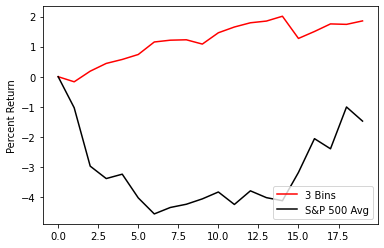

In [34]:
plt.plot(p3_list,color="red",label="3 Bins")
plt.plot(sp_list,color="black",label="S&P 500 Avg")
plt.legend(loc="lower right")
plt.ylabel("Percent Return")

## 5 Bins

In [35]:
bin5_df = aggregate_portfolio(df, 5)
bin5_df

,date,portfolio,sp
0,2021-01-04,-0.104161,-1.031859
1,2021-01-05,0.507638,-1.939469
2,2021-01-06,0.292904,-0.412426
3,2021-01-07,0.204414,0.145465
4,2021-01-08,0.102876,-0.787924
5,2021-01-11,0.466574,-0.532141
6,2021-01-12,0.217391,0.213768
7,2021-01-13,-0.136603,0.107348
8,2021-01-14,-0.161883,0.178540
9,2021-01-15,0.301248,0.228961


In [36]:
p5_list, _ = agg_returns(bin5_df)
print(round(p5_list[-1],2) == round(bin5_df.portfolio.sum(),2))
print(round(sp_list[-1],2) == round(bin5_df.sp.sum(),2))
print("5 Bin performance: " +str(round(bin5_df.portfolio.sum(),2)-round(bin5_df.sp.sum(),2))+"%")

True
True
5 Bin performance: 2.86%


Text(0, 0.5, 'Percent Return')

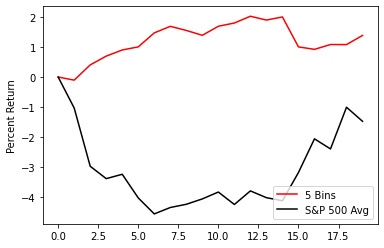

In [37]:
plt.plot(p5_list,color="red",label="5 Bins")
plt.plot(sp_list,color="black",label="S&P 500 Avg")
plt.legend(loc="lower right")
plt.ylabel("Percent Return")

## 10 Bins

In [38]:
bin10_df = aggregate_portfolio(df, 10)
bin10_df

,date,portfolio,sp
0,2021-01-04,-0.242561,-1.031859
1,2021-01-05,0.465930,-1.939469
2,2021-01-06,0.003486,-0.412426
3,2021-01-07,0.244471,0.145465
4,2021-01-08,0.099779,-0.787924
5,2021-01-11,0.584204,-0.532141
6,2021-01-12,0.082404,0.213768
7,2021-01-13,0.041725,0.107348
8,2021-01-14,0.033599,0.178540
9,2021-01-15,0.155162,0.228961


In [39]:
p10_list, _ = agg_returns(bin10_df)
print(round(p10_list[-1],2) == round(bin10_df.portfolio.sum(),2))
print(round(sp_list[-1],2) == round(bin10_df.sp.sum(),2))
print("10 Bin performance: " +str(round(bin10_df.portfolio.sum(),2)-round(bin10_df.sp.sum(),2))+"%")

True
True
10 Bin performance: 1.55%


Text(0, 0.5, 'Percent Return')

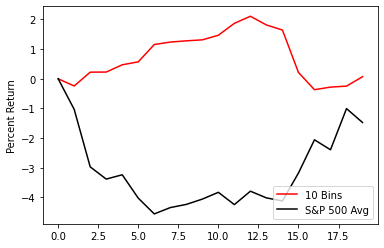

In [40]:
plt.plot(p10_list,color="red",label="10 Bins")
plt.plot(sp_list,color="black",label="S&P 500 Avg")
plt.legend(loc="lower right")
plt.ylabel("Percent Return")

## Comparison

In [41]:
print("3 Bin performance: " +str(round(bin3_df.portfolio.sum(),2)-round(bin3_df.sp.sum(),2))+"%")
print("5 Bin performance: " +str(round(bin5_df.portfolio.sum(),2)-round(bin5_df.sp.sum(),2))+"%")
print("10 Bin performance: " +str(round(bin10_df.portfolio.sum(),2)-round(bin10_df.sp.sum(),2))+"%")

3 Bin performance: 3.33%
5 Bin performance: 2.86%
10 Bin performance: 1.55%


In [54]:
print("S&P 500 Avg return: " +str(round(bin3_df.sp.sum(),2))+"%")
print("3 Bin return: " +str(round(bin3_df.portfolio.sum(),2))+"%")
print("5 Bin return: " +str(round(bin5_df.portfolio.sum(),2))+"%")
print("10 Bin return: " +str(round(bin10_df.portfolio.sum(),2))+"%")

S&P 500 Avg return: -1.48%
3 Bin return: 1.85%
5 Bin return: 1.38%
10 Bin return: 0.07%


In [42]:
from datetime import datetime
date_list = list(bin10_df.date)
date_list.insert(0,'2021-01-03')
date_list = [dt.datetime.strptime(dd,"%Y-%m-%d").date() for dd in date_list]

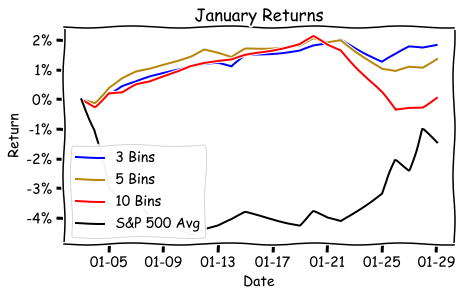

In [55]:
from matplotlib.dates import DateFormatter, DayLocator, MonthLocator

with plt.xkcd():  
    fig = plt.figure(1, (7,4))
    ax = fig.add_subplot(1,1,1)
    ax.plot(date_list,p3_list,color="blue",label="3 Bins")
    ax.plot(date_list,p5_list,color="darkgoldenrod",label="5 Bins")
    ax.plot(date_list,p10_list,color="red",label="10 Bins")
    ax.plot(date_list,sp_list,color="black",label="S&P 500 Avg")
    ax.legend(loc="lower left")
    ax.set_ylabel("Return")
    ax.set_xlabel("Date")
    yfmt = '%.0f%%' # Format you want the ticks, e.g. '40%'
    yticks = mtick.FormatStrFormatter(yfmt)
    ax.yaxis.set_major_formatter(yticks)
    xfmt = mdates.DateFormatter('%m-%d')
    ax.xaxis.set_major_formatter(xfmt)
    ax.set_title("January Returns")

In [62]:
2*(len(df[df.date == '2021-01-04'])//10)

100